# L5: Extracting Tables

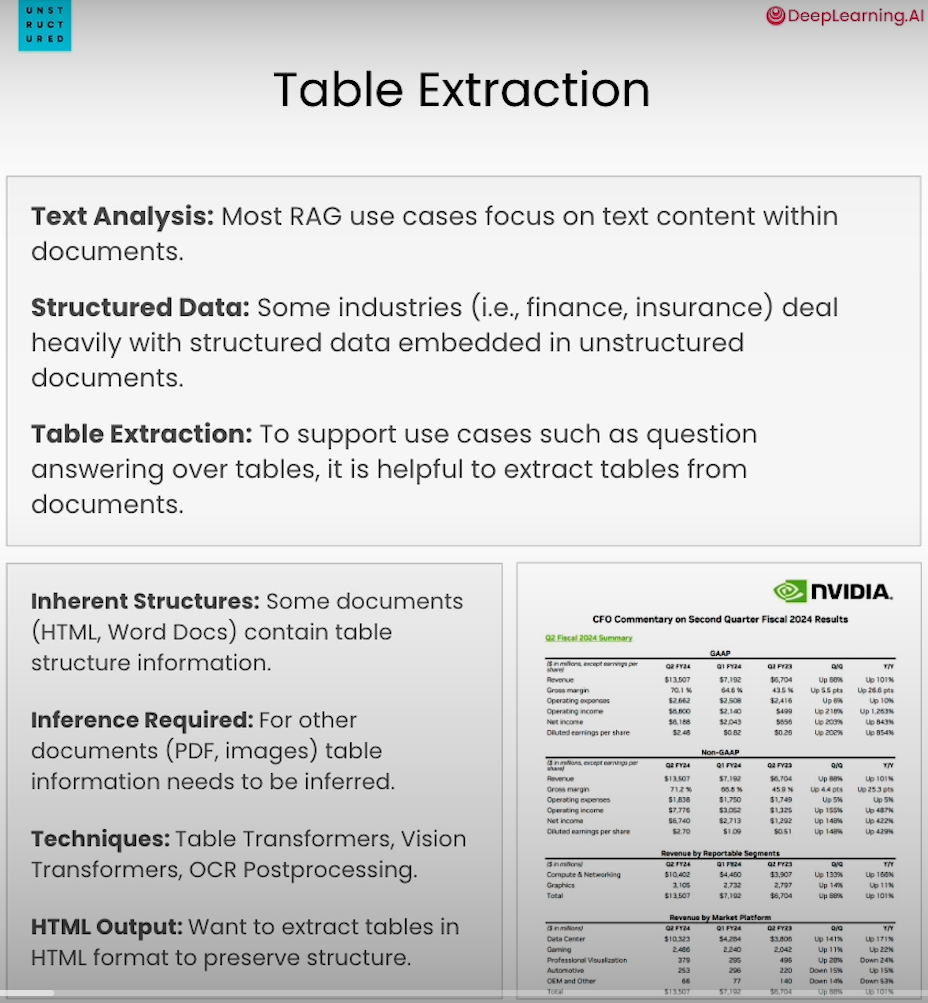

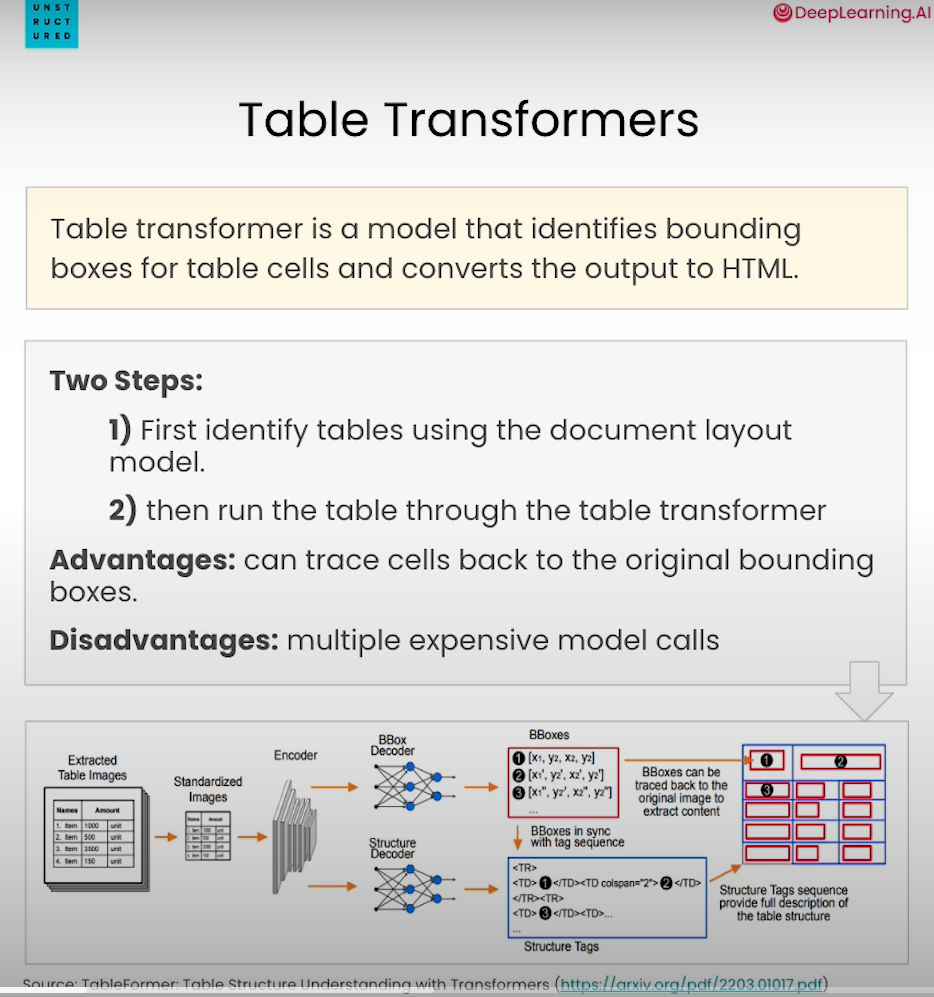

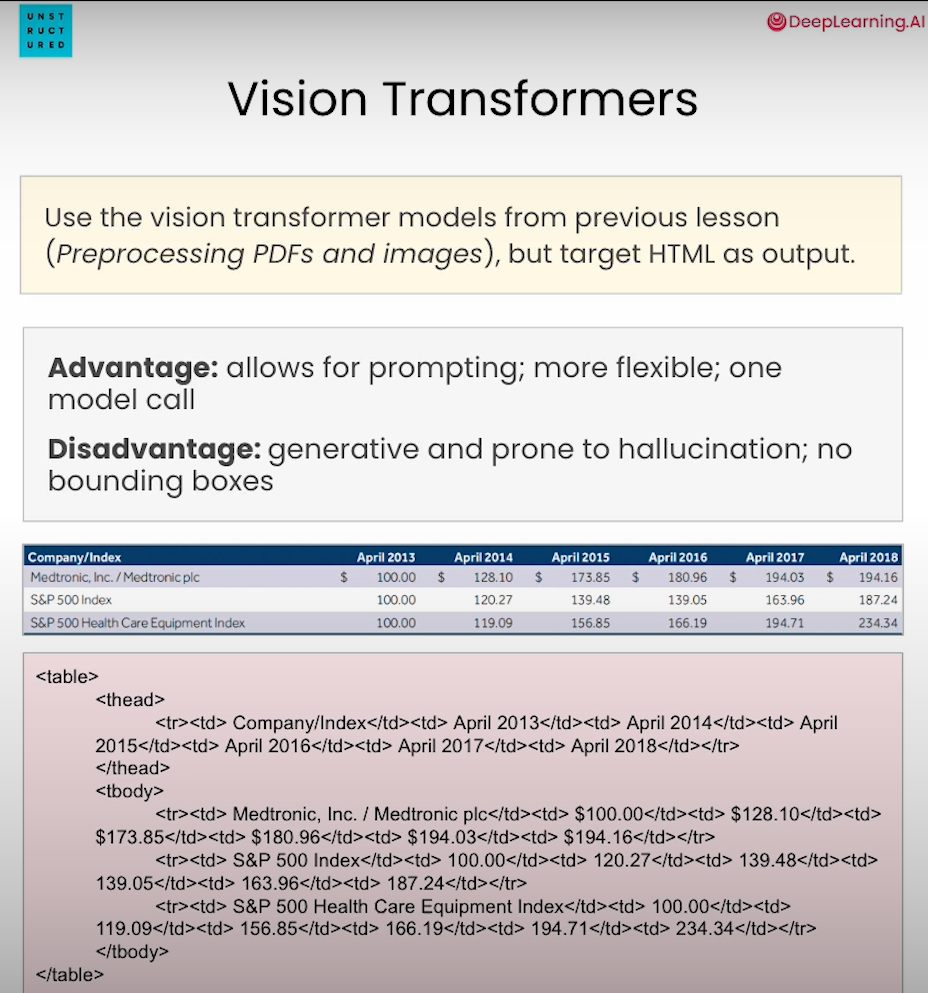

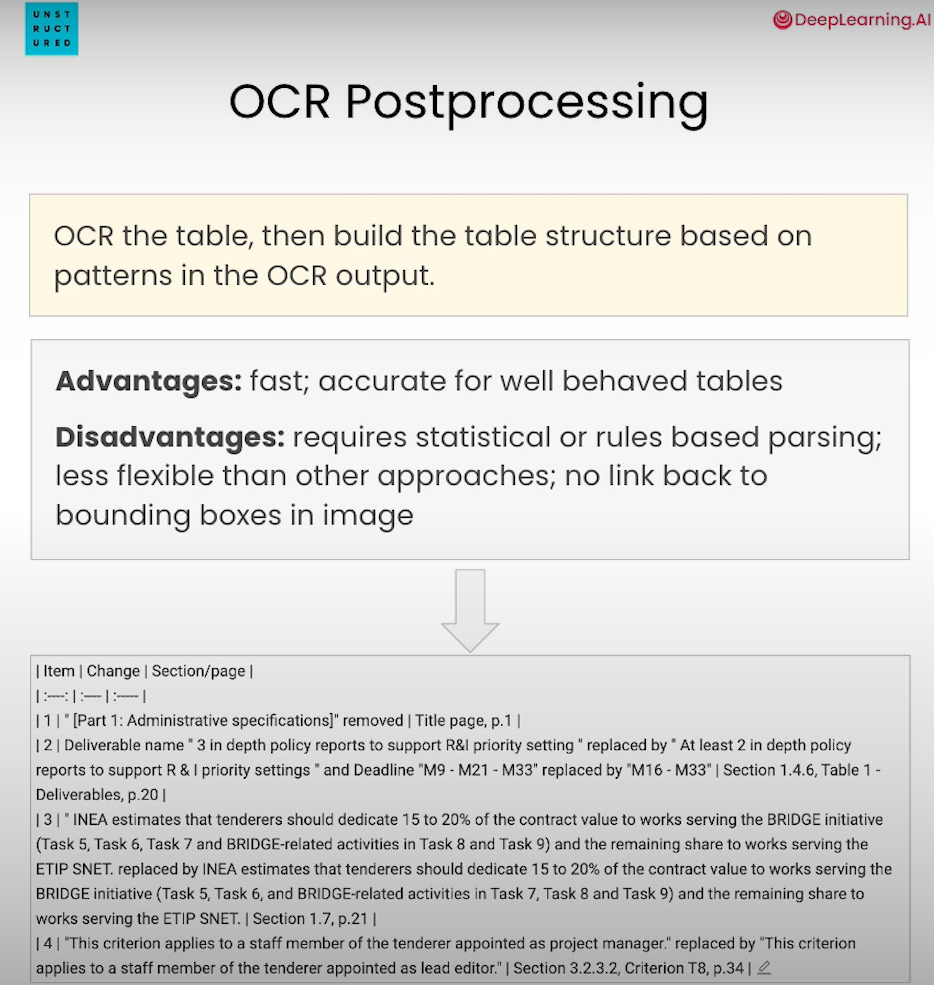

In [ ]:
%pip install unstructured

In [1]:
# Warning control
import warnings
warnings.filterwarnings('ignore')

In [3]:
from unstructured_client import UnstructuredClient
from unstructured_client.models import shared
from unstructured_client.models.errors import SDKError
from unstructured.staging.base import dict_to_elements

In [ ]:
from Utils import Utils
utils = Utils()

DLAI_API_KEY = utils.get_dlai_api_key()
DLAI_API_URL = utils.get_dlai_url()

s = UnstructuredClient(
    api_key_auth=DLAI_API_KEY,
    server_url=DLAI_API_URL,
)

<p style="background-color:#fff6ff; padding:15px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px"> 💻 &nbsp; <b>Access Utils File and Helper Functions:</b> To access helper functions and other related files for this notebook, 1) click on the <em>"View"</em> option on the top menu of the notebook and then 2) click on <em>"File Browser"</em>. For more help, please see the <em>"Appendix - Tips and Help"</em> Lesson.</p>


## Example Document: Embedded Images and Tables

In [ ]:
from IPython.display import Image
Image(filename="images/embedded-images-tables.jpg", height=600, width=600) 

## Process the Document and Extract Tables

In [ ]:
filename = "example_files/embedded-images-tables.pdf"

with open(filename, "rb") as f:
    files=shared.Files(
        content=f.read(),
        file_name=filename,
    )

req = shared.PartitionParameters(
    files=files,
    strategy="hi_res",
    hi_res_model_name="yolox",
    skip_infer_table_types=[],
    pdf_infer_table_structure=True,
)

try:
    resp = s.general.partition(req)
    elements = dict_to_elements(resp.elements)
except SDKError as e:
    print(e)

In [ ]:
tables = [el for el in elements if el.category == "Table"]

In [ ]:
tables[0].text

In [ ]:
table_html = tables[0].metadata.text_as_html

In [ ]:
from io import StringIO 
from lxml import etree

parser = etree.XMLParser(remove_blank_text=True)
file_obj = StringIO(table_html)
tree = etree.parse(file_obj, parser)
print(etree.tostring(tree, pretty_print=True).decode())

In [ ]:
from IPython.core.display import HTML
HTML(table_html)

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.documents import Document
from langchain.chains.summarize import load_summarize_chain

In [ ]:
llm = ChatOpenAI(temperature=0, model_name="gpt-3.5-turbo-1106")
chain = load_summarize_chain(llm, chain_type="stuff")
chain.invoke([Document(page_content=table_html)])

## Work With Your Own Files

In [ ]:
import panel as pn
#import param
from Utils import upld_file
pn.extension()

upld_widget = upld_file()
pn.Row(upld_widget.widget_file_upload)

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> 🖥 &nbsp; <b>Note:</b> If the file upload interface isn't functioning properly, the issue may be related to your browser version. In such a case, please ensure your browser is updated to the latest version, or try using a different browser.</p>


In [ ]:
!ls ./example_files

<p style="background-color:#fff6ff; padding:15px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px"> 💻 &nbsp; <b>Uploading Your Own File - Method 2:</b> To upload your own files, you can also 1) click on the <em>"View"</em> option on the top menu of the notebook and then 2) click on <em>"File Browser"</em>. Then 3) click on <em>"Upload"</em> button to upload your files. For more help, please see the <em>"Appendix - Tips and Help"</em> Lesson.</p>